In [52]:
# Read data
import pandas as pd
df=pd.read_csv('titanic.csv')

# Drop the unused variables
df=df.drop(['Name'], axis=1)

df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [53]:
from patsy import dmatrices
# Create matrices
y, X= dmatrices('Survived ~ Age + Fare + Q("Siblings/Spouses Aboard") + Q("Parents/Children Aboard") + C(Pclass) + C(Sex)', df, return_type = 'dataframe')

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.drop(['Intercept'], axis=1), y, test_size=0.3)

In [204]:
X_train.head()

,C(Pclass)[T.2],C(Pclass)[T.3],C(Sex)[T.male],Age,Fare,"Q(""Siblings/Spouses Aboard"")","Q(""Parents/Children Aboard"")"
149,1.0,0.0,1.0,51.0,12.5250,0.0,0.0
535,0.0,1.0,1.0,69.0,14.5000,0.0,0.0
273,0.0,0.0,0.0,63.0,77.9583,1.0,0.0
380,0.0,1.0,1.0,32.0,7.9250,0.0,0.0
529,0.0,1.0,1.0,17.0,7.2292,1.0,1.0


# Gradient Descent Method

### 1. Transform the data

In [208]:
import numpy as np
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
y_train = y_train['Survived'][:, np.newaxis]
theta_train = np.zeros((X_train.shape[1], 1))

C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### 2. Define Functions

In [213]:
class LogitGradientDescent():
    def __init__(self):
        self.theta0=theta_train
    
    def sigmoid(X):
    # Activation function used to map any real value between 0 and 1
        return 1 / (1 + np.exp(-X))
    
    def net_input(theta, X):
        # Computes the weighted sum of inputs
        return np.dot(X, theta)

    def probability(theta, X):
        # Returns the probability after passing through sigmoid
        return sigmoid(net_input(theta, X))
    
    def cost_function(theta, X, y):
        # Computes the cost function for all the training samples
        m = X.shape[0]
        total_cost = -(1 / m) * np.sum(
            y * np.log(probability(theta, X)) + (1 - y) * np.log(
                1 - probability(theta, X)))
        return total_cost
    
    def gradient(theta, X, y):
        # Computes the gradient of the cost function at the point theta
        m = X.shape[0]
        return (1 / m) * np.dot(X.T, sigmoid(net_input(theta,X)) - y)
    
    def fit(self, X, y):
        opt_weights = fmin_tnc(func=cost_function, x0=self.theta0,
                      fprime=gradient, args=(X, y.flatten()))
        return opt_weights[0]

### 3. Fit the model

In [214]:
model=LogitGradientDescent()
parametors=model.fit(X_train, y_train)
parametors_matrix=np.asmatrix(parametors).T

### 4. Investigate Predict Result

In [193]:
predict_input=net_input(parametors_matrix, X_train)
prediction=sigmoid(predict_input)

In [194]:
threshold=0.5
predicted=[1 if i>=threshold else 0 for i in prediction]

Text(0.5, 257.44, 'Predicted label')

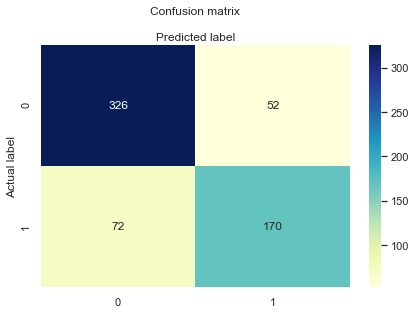

In [195]:
# Use the sklearn confusion matrix function
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, predicted)

# Plot confusion matrix
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

fig, ax = plt.subplots()

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 5. Use test dataset

In [205]:
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_test = y_test['Survived'][:, np.newaxis]

predict_input_test=net_input(parametors_matrix, X_test)
prediction_test=sigmoid(predict_input_test)
threshold=0.5
predicted_test=[1 if i>=threshold else 0 for i in prediction_test]

C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Text(0.5, 257.44, 'Predicted label')

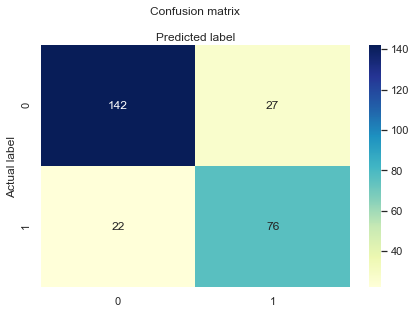

In [206]:
# Use the sklearn confusion matrix function
from sklearn.metrics import confusion_matrix
confusion_matrix_test = confusion_matrix(y_test, predicted_test)

# Plot confusion matrix
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

fig, ax = plt.subplots()

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_matrix_test), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [207]:
# Use sklearn to get F1 score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predicted_test)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(y_test, predicted_test)))
print('Precision: {:.2f}'.format(precision_score(y_test, predicted_test)))
print('Recall: {:.2f}'.format(recall_score(y_test, predicted_test)))
print('f1_score: {:.2f}'.format(f1_score(y_test, predicted_test)))

Accuracy: 0.82
Error rate: 0.18
Precision: 0.74
Recall: 0.78
f1_score: 0.76
